<a href="https://colab.research.google.com/github/femi1609/Prodigy/blob/main/PRODIGY_DS_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

accidents_df = pd.read_csv("/content/AccidentsBig.csv")
accidents_df

<ipython-input-6-26722292cbd0>:5: DtypeWarning: Columns (8,10,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents_df = pd.read_csv("/content/AccidentsBig.csv")


,Accident_Index,longitude,latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Date
0,1.0,78.610393,14.724026,1.0,2.0,1.0,1.0,3.0,17:42,12.0,...,1.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,E01002849,04-01-2018
1,2.0,78.534042,14.762353,1.0,3.0,1.0,1.0,4.0,17:36,12.0,...,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002909,05-01-2018
2,3.0,78.470877,14.745606,1.0,3.0,2.0,1.0,5.0,00:15,12.0,...,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002857,06-01-2018
3,4.0,78.557994,14.667128,1.0,3.0,1.0,1.0,6.0,10:35,12.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002840,07-01-2018
4,5.0,78.576431,14.703443,1.0,3.0,1.0,1.0,2.0,21:13,12.0,...,0.0,7.0,1.0,2.0,0.0,0.0,1.0,1.0,E01002863,10-01-2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
accidents_df.isnull().sum()

Accident_Index                                 988577
longitude                                      988577
latitude                                       988577
Police_Force                                   988577
Accident_Severity                              988577
Number_of_Vehicles                             988577
Number_of_Casualties                           988577
Day_of_Week                                    988577
Time                                           988578
Local_Authority_(District)                     988577
Local_Authority_(Highway)                      988577
1st_Road_Class                                 988577
1st_Road_Number                                988577
Road_Type                                      988577
Speed_limit                                    988577
Junction_Detail                                988577
Junction_Control                               988577
2nd_Road_Class                                 988577
2nd_Road_Number             

In [8]:
accidents_df.dropna(inplace=True)

In [9]:
accidents_df.shape

(59900, 30)

In [10]:
accidents_df = accidents_df.drop(columns=['Local_Authority_(Highway)', 'LSOA_of_Accident_Location'])
accidents_df.shape

(59900, 28)

In [13]:
accidents_df['Date'] = pd.to_datetime(accidents_df['Date'], format='%d-%m-%Y')
accidents_df['Time'] = pd.to_datetime(accidents_df['Time'], format='%H:%M')

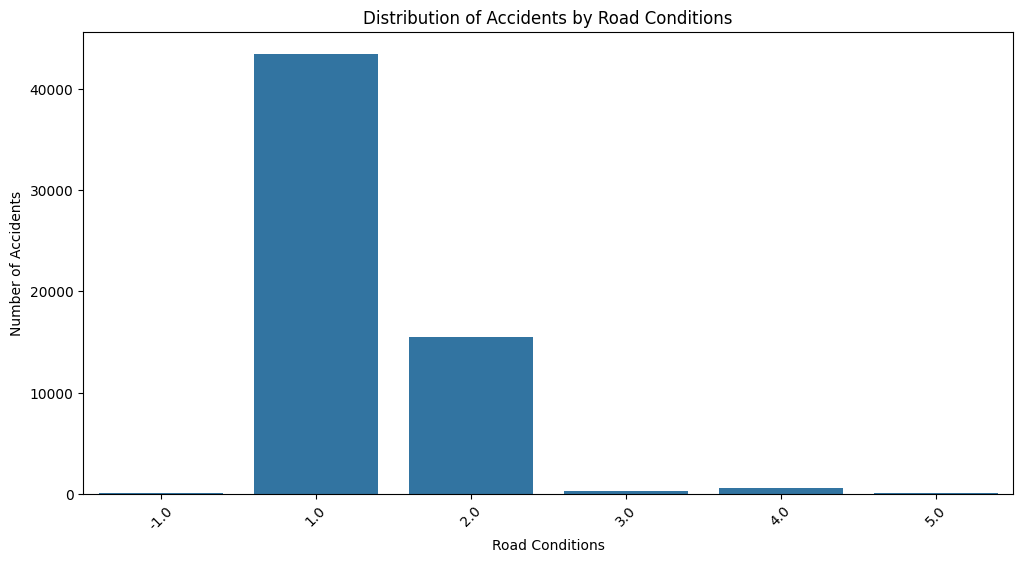

In [14]:
# EDA: Distribution of accidents by road conditions, weather conditions, and time of day
plt.figure(figsize=(12, 6))
sns.countplot(data=accidents_df, x='Road_Surface_Conditions')
plt.title('Distribution of Accidents by Road Conditions')
plt.xlabel('Road Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

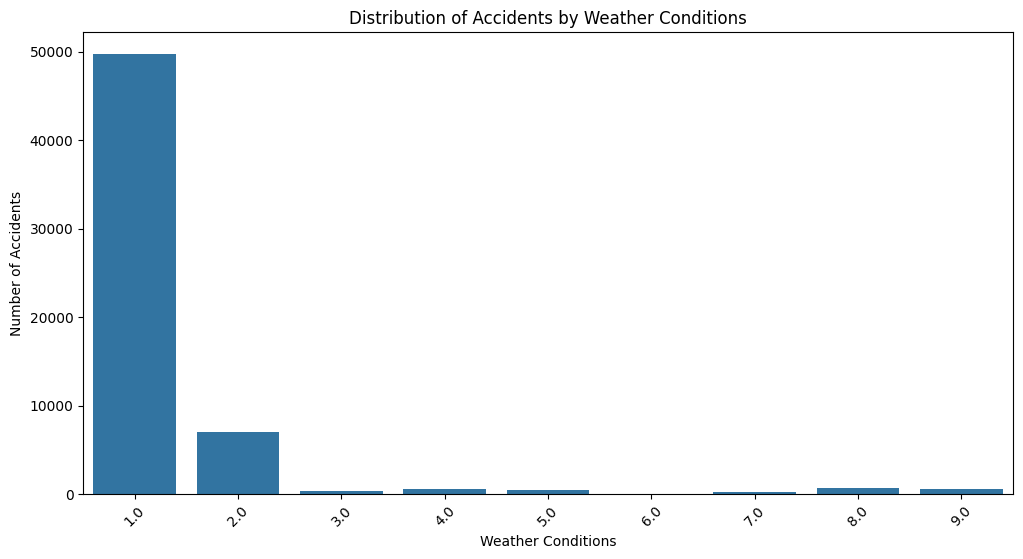

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(data=accidents_df, x='Weather_Conditions')
plt.title('Distribution of Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

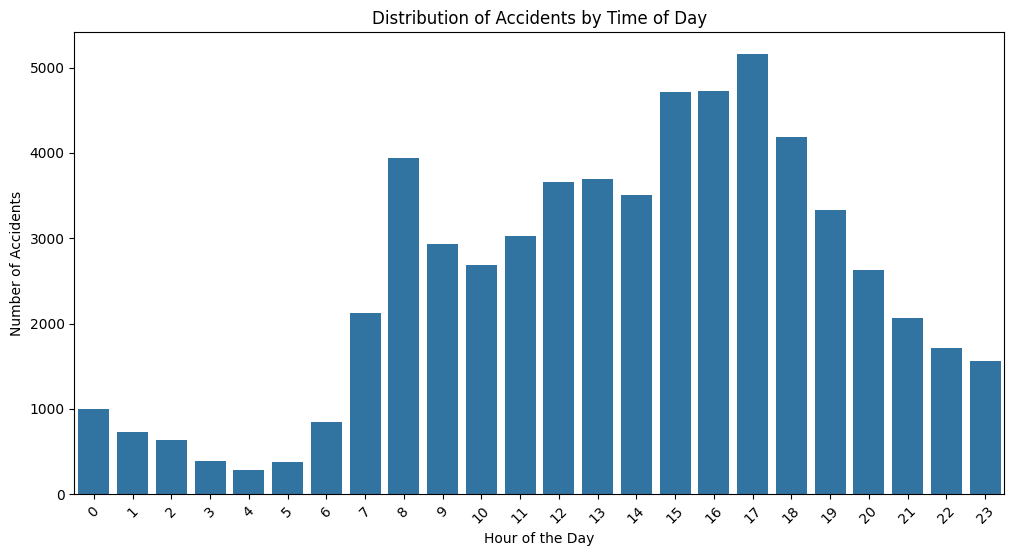

In [17]:
accidents_df['Hour'] = accidents_df['Time'].dt.hour
plt.figure(figsize=(12, 6))
sns.countplot(data=accidents_df, x='Hour')
plt.title('Distribution of Accidents by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

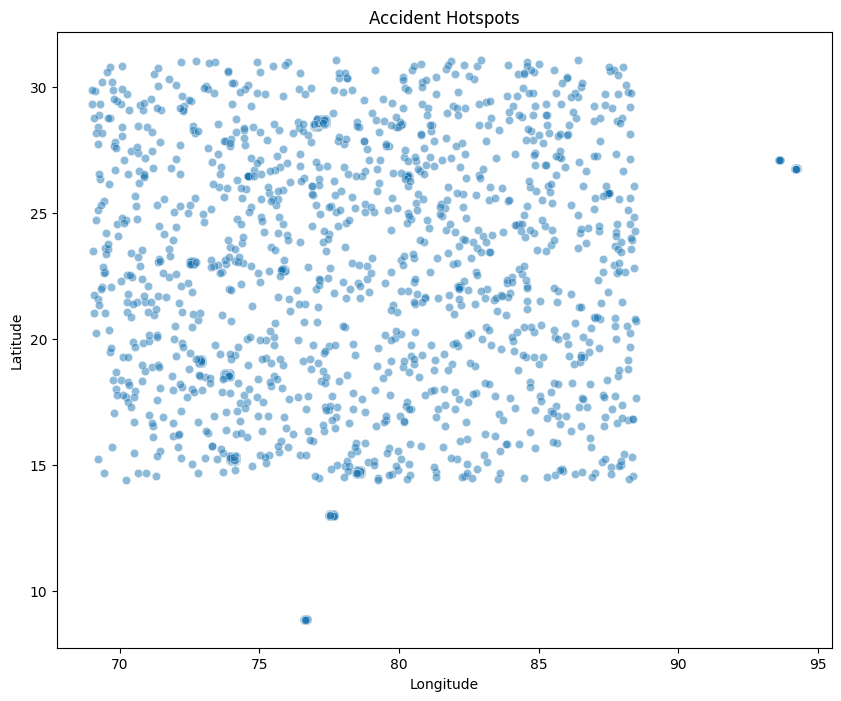

In [18]:
# Visualization of accident hotspots
plt.figure(figsize=(10, 8))
sns.scatterplot(data=accidents_df, x='longitude', y='latitude', alpha=0.5)
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

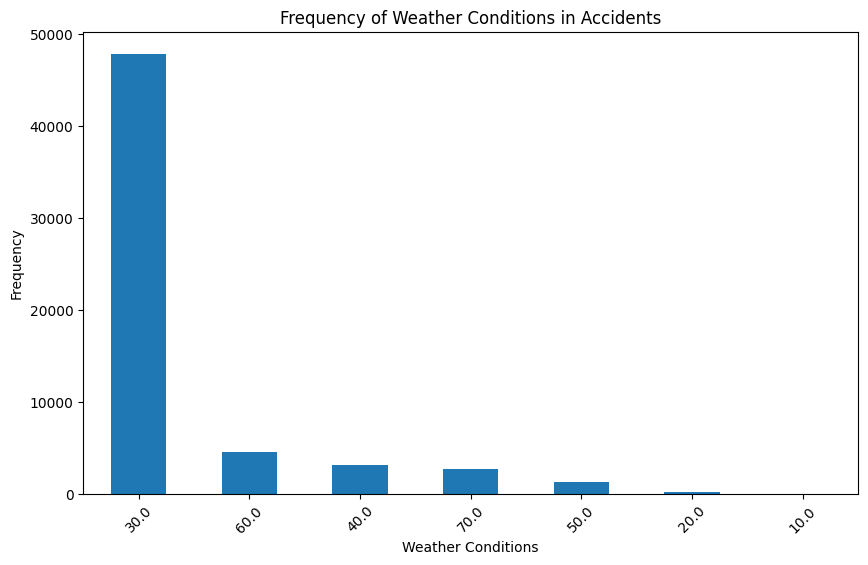

In [22]:
import matplotlib.pyplot as plt

contributing_factor_counts = accidents_df['Speed_limit'].value_counts()

plt.figure(figsize=(10, 6))
contributing_factor_counts.plot(kind='bar')
plt.title('Frequency of Weather Conditions in Accidents')
plt.xlabel('Speed Limit')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()